In [87]:
import pandas as pd
import plotly.express as px

poke = pd.read_csv('pokedex_limpa.csv')

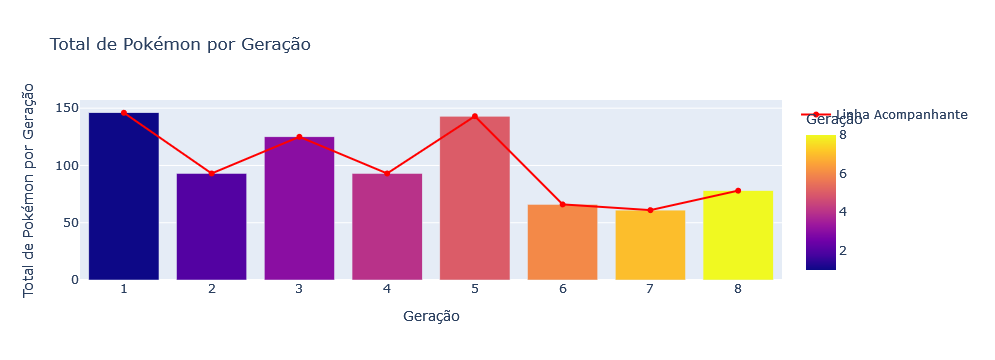

In [92]:
# Agrupando por geração e contando a quantidade de pokemons por geração
poke_generation = poke.groupby('generation').agg({
    'name':'count'
}).reset_index()

# Criando o gráfico
fig = px.bar(poke_generation, x='generation', y='name', title='Total de Pokémon por Geração', color='generation',
            labels={
                'generation':'Geração',
                'name':'Total de Pokémon por Geração'
            })

# Adiconando a linha para seguir o topo das barras
fig.add_scatter(x=poke_generation['generation'], y=poke_generation['name'], 
                 mode='lines+markers', name='Linha Acompanhante', 
                 line=dict(color='red', width=2))

fig.show()

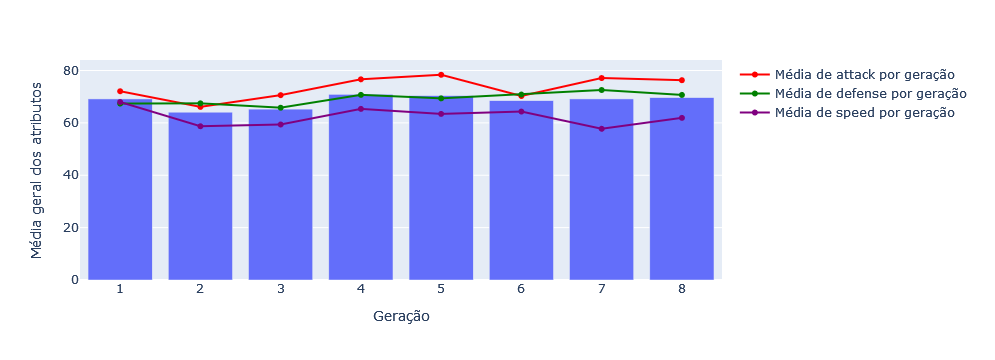

In [95]:
# Agrupando os pkemons pela geração e fazendo a média dos seus atributos
poke_status = poke.groupby('generation').agg({
    'attack':'mean',
    'defense':'mean',
    'speed':'mean'
}).reset_index()

# Criando uma nova coluna tendo a média geral dos pokemons de cada geração
poke_status['mean_total'] = poke_status[['attack', 'defense', 'speed']].mean(axis=1)

# Criando o gráfico
fig = px.bar(poke_status, x='generation',y='mean_total',
            labels={
             'mean_total':'Média geral dos atributos',
             'generation':'Geração'
            })

# Adicionando as linhas das médias
fig.add_scatter(x=poke_status['generation'], y=poke_status['attack'], 
                 mode='lines+markers', name='Média de attack por geração', 
                 line=dict(color='red', width=2))

fig.add_scatter(x=poke_status['generation'], y=poke_status['defense'], 
                 mode='lines+markers', name='Média de defense por geração', 
                 line=dict(color='green', width=2))

fig.add_scatter(x=poke_status['generation'], y=poke_status['speed'], 
                 mode='lines+markers', name='Média de speed por geração', 
                 line=dict(color='purple', width=2))


fig.show()

 Os jogos de pokemons costumam ser balanceados, podemos notar isso na média total dos atributos entre as gerações que não variam muito. Porém podemos notar que existe uma leve tendencia de aumento da média de attack e defence nass últimas gerações.
 Alguns dos possíveis motivos são: O level desing dos pokemons mudam conforme as gerações, quase sempre acompanhando a história do próprio jogo, como a região em que eles estão e o nível das batalhas da região.
 Um detalhe que se deve notar é que na sexta geração ouve um declinio na média de attack e um aumento dos outros atributos. Essa geração é considerada uma das "piores" gerações para os fãs da franquia. Isso pode se dar pelo fato de que o desing dos pokemons serem mais "amigáveis" e menos "Agressivos", detalhe que os fãs não gostaram. porém a franquia tem criado um certo padrão na ditribuição desde então.